In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import scipy.stats

franchises = {"Brooklyn Nets": 1610612751, "Minnesota Timberwolves":1610612750 ,"Golden State Warriors": 1610612744, 
              "Los Angeles Clippers": 1610612746, "Los Angeles Lakers": 1610612747, "Washington Wizards": 1610612764, 
              "Milwaukee Bucks": 1610612749, "Toronto Raptors": 1610612761, "Philadelphia 76ers": 1610612755 , 
              "Boston Celtics":1610612738 ,  "Orlando Magic": 1610612753, "Atlanta Hawks":1610612737,
              "Houston Rockets": 1610612745 , "San Antontio Spurs":  1610612759, "New Orleans Pelicans": 1610612740, 
              "Pheonix Suns": 1610612756, "Sacramento Kings": 1610612758, "Portland Trailblazers": 1610612757, 
              "Denver Nuggets":1610612743 , "Memphis Grizzlies": 1610612763, "Miami Heat":1610612748, 
              "Cleveland Cavaliers": 1610612739, "Charlotte Hornets":1610612766, "Chicago Bulls": 1610612741, 
              "New York Knicks": 1610612752, "Indiana Pacers":1610612754 , "Utah Jazz":1610612762 , 
              "Detroit Pistons": 1610612765, "Dallas Mavericks": 1610612742, "Oklahoma City Thunder": 1610612760,  
             }
num_wins = {"Brooklyn Nets": 28, 
              "Minnesota Timberwolves":47 ,
              "Golden State Warriors": 58, 
              "Los Angeles Clippers": 42, 
              "Los Angeles Lakers": 35, 
              "Washington Wizards": 43, 
              "Milwaukee Bucks": 44, 
              "Toronto Raptors": 59, 
              "Philadelphia 76ers": 52 , 
              "Boston Celtics":55 ,  
              "Orlando Magic": 29, "Atlanta Hawks":24,
              "Houston Rockets": 65, 
              "San Antontio Spurs":  47, 
              "New Orleans Pelicans": 48, 
              "Pheonix Suns": 21, 
              "Sacramento Kings": 27, 
              "Portland Trailblazers": 49, 
              "Denver Nuggets":46 , 
              "Memphis Grizzlies": 22, 
              "Miami Heat":44, 
              "Cleveland Cavaliers": 50, 
              "Charlotte Hornets":36,
              "Chicago Bulls": 27, 
              "New York Knicks": 29, 
              "Indiana Pacers":48 , 
              "Utah Jazz":48 , 
              "Detroit Pistons": 39, 
              "Dallas Mavericks": 24, "Oklahoma City Thunder": 48,  
             }
players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']
def degrees_passing(team_id, win):
    G = nx.DiGraph()
    labels = {}
    widths = []
    out_deg = {}
    in_deg = {}
    tots = {}
    for name in players:
        iden = players[name]
        if (teams[iden] != team_id):
            continue
        if (iden not in out_deg):
            out_deg[iden] = 0
        if (win == True):
            fname = "data/"+players[name]+"-passing-win.json"
        elif (win == False):
            fname = "data/"+players[name]+"-passing-loss.json"
        else:
            fname = "data/"+players[name]+"-passing.json"
    
        with open(fname, "r") as f:
            data = json.load(f)
        labels[iden] = name
        for key in data:
            if (teams[key] != team_id):
                continue
            out_deg[iden] += data[key][0]
            if (key not in in_deg):
                in_deg[key] = 0
            in_deg[key] += data[key][0]
            widths.append(data[key][0]/20.0)
            G.add_edge(iden, key, weight = data[key][0])
            labels[key] = ids[key]

    for key in in_deg:
        tots[key] = in_deg[key]+out_deg[key]
     
    active_vals = sorted(tots.values(), reverse=True)[:]
    active = []
    for fl in tots:
        if tots[fl] in active_vals:
            active.append(fl)
    pl_ids = list(in_deg)
    for key in pl_ids:
        if key not in active:
            del out_deg[key]
            del in_deg[key]
    
    return out_deg, in_deg, G, widths, labels

def show_graph(G, widths, labels):
    plt.figure(figsize=(10,10))
    pos = nx.circular_layout(G)
    nx.draw_networkx_edges(G, pos, width=widths)
    nx.draw_networkx_nodes(G, pos, node_size=50)
    nx.draw_networkx_labels(G,pos,labels, font_size=6)

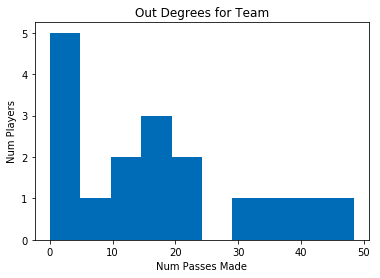

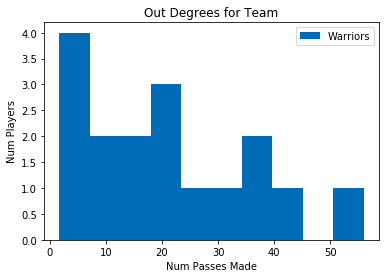

In [11]:
out,inn, G, width, labels = degrees_passing(franchises["Utah Jazz"], False)
plt.hist(list(out.values()),color="#006BB6", label="Warriors")
plt.title("Out Degrees for Team")
plt.xlabel("Num Passes Made")
plt.ylabel("Num Players")
plt.show()

out,inn, G, width, labels = degrees_passing(franchises["Utah Jazz"], True)
plt.hist(list(out.values()), color="#006BB6", label="Warriors")
plt.legend()
plt.title("Out Degrees for Team")
plt.xlabel("Num Passes Made")
plt.ylabel("Num Players")
plt.show()